Detailed panel by panel comparison of bathymetry 201702 to 201803d and the river file for 201803 (which was done earlier than d)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import river_202101 as r202101
from salishsea_tools import river_201803 as r201803

%matplotlib inline

In [3]:
b201702 = xr.open_dataset('../../../../grid/bathymetry_201702.nc')
b201803d = xr. open_dataset('../../../../sea_initial_hg/bathymetry_201803d.nc')

In [4]:
r202102 = xr.open_dataset('../../../../rivers-climatology/rivers_daily_202102.nc').rorunoff[5]
r201803 = xr.open_dataset('../../../../sea_initial_hg/rivers_month_201803.nc').rorunoff[5]
d202102 = xr.open_dataset('../../../../rivers-climatology/rivers_daily_202102.nc').rodepth[5]
d201803 = xr.open_dataset('../../../../sea_initial_hg/rivers_month_201803.nc').rodepth[:]

In [6]:
def make_the_plots(istart, iend, jstart,jend):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    colours = axs[0, 0].pcolormesh(np.arange(jstart, jend+1), np.arange(istart, iend+1), b201702.Bathymetry[istart:iend, jstart:jend],
            cmap='nipy_spectral', vmax=15);
    axs[0, 0].set_title('Bathymetry 201702')
    axs[0, 1].pcolormesh(np.arange(jstart, jend+1), np.arange(istart, iend+1), b201803d.Bathymetry[istart:iend, jstart:jend],
            cmap='nipy_spectral', vmax=15);
    axs[0, 1].set_title('Bathymetry 201803')
    colours = axs[0, 2].pcolormesh(np.arange(jstart, jend+1), np.arange(istart, iend+1), 
             (b201803d.Bathymetry[istart:iend, jstart:jend].fillna(0) 
            - b201702.Bathymetry[istart:iend, jstart:jend].fillna(0)), cmap='Blues_r');
    axs[0, 2].set_title('Bathy 201803 -Bathy 201702')
    highest = np.max(b201803d.Bathymetry[istart:iend, jstart:jend].fillna(0) 
            - b201702.Bathymetry[istart:iend, jstart:jend].fillna(0)).item()
    lowest = np.min(b201803d.Bathymetry[istart:iend, jstart:jend].fillna(0) 
            - b201702.Bathymetry[istart:iend, jstart:jend].fillna(0)).item()
    axs[0, 2].text(jstart+10, iend-10, f'{lowest}-{highest}')
    for i in range(istart, iend):
        for j in range(jstart, jend):
            if r202102[i, j] > 0:
                axs[0, 0].plot(j, i, 'ro')
                axs[1, 0].scatter(j, i, c=d202102[i, j]/3., s=100)
                axs[1, 2].scatter(j, i, c='r',s=100)
    axs[1, 0].set_title('depth 202102 rivers')
    axs[1, 2].set_title('rivers in 202102 (red), 201803 (blue)')
    for i in range(istart, iend):
        for j in range(jstart, jend):
            if r201803[i, j] > 0:
                axs[0, 1].plot(j, i, 'ro')
                axs[1, 1].scatter(j, i, c=d201803[i, j]/3., s=100)
                axs[1, 2].scatter(j, i, c='b')
    axs[1, 1].set_title('depth 201803 rivers')
    for ax in axs[1]:
        ax.set_xlim(jstart, jend);
        ax.set_ylim(istart, iend);

## Tile One 
 * nothing
 
## Tile Two

 * looks good

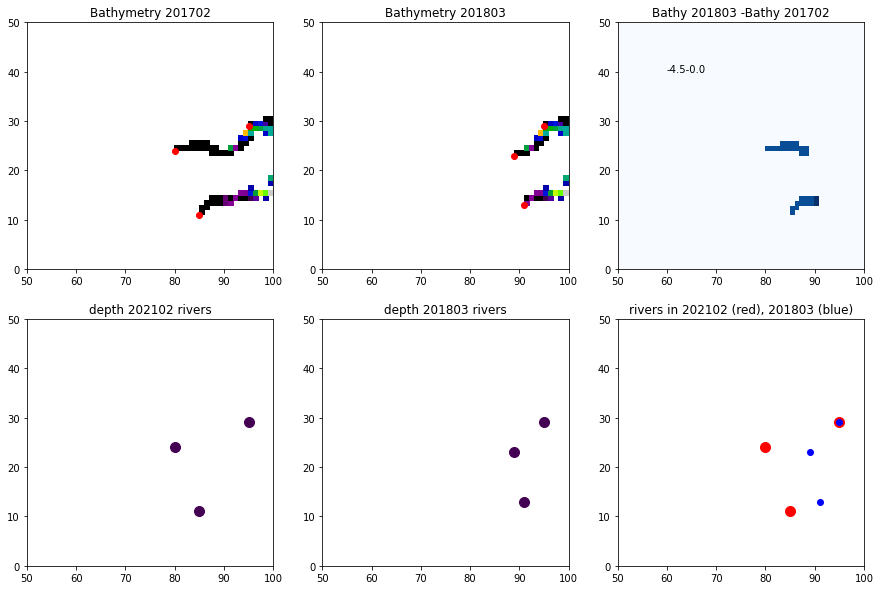

In [7]:
istart, iend = 0, 50
jstart, jend = 50, 100
make_the_plots(istart, iend, jstart,jend)

## Tile Three

* Removed parts of Nisqually flats, end of Henderson Inlet, parts of Budd Inlet, join Harstine and Squaxin, join Herron Island to Pennisula

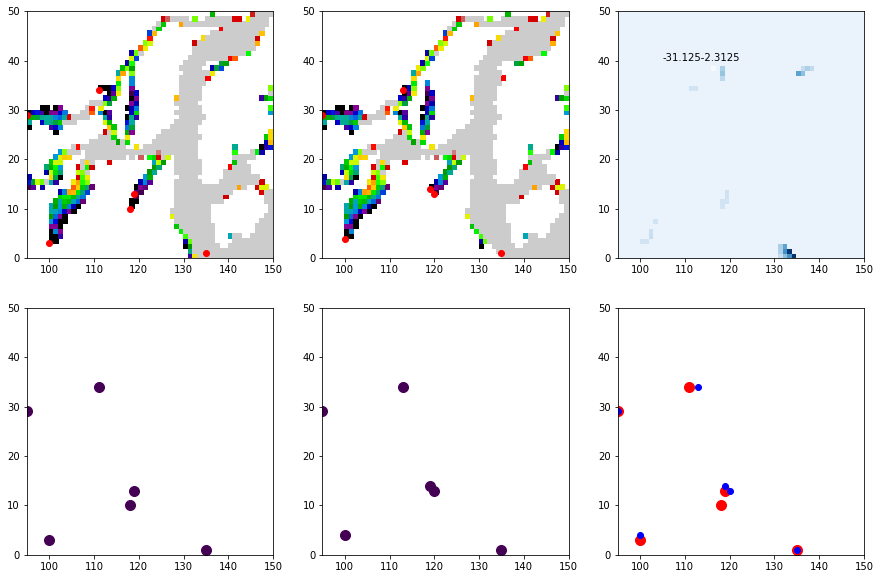

In [171]:
istart, iend = 0, 50
jstart, jend = 95, 150
make_the_plots(istart, iend, jstart,jend)

47.23407745361328 -122.90007781982422


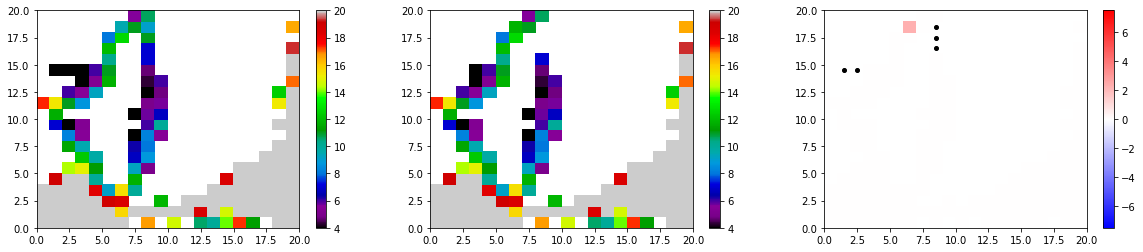

In [173]:
js, je = 110, 130
ii, ie = 20, 40
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

47.302040100097656 -122.85324096679688


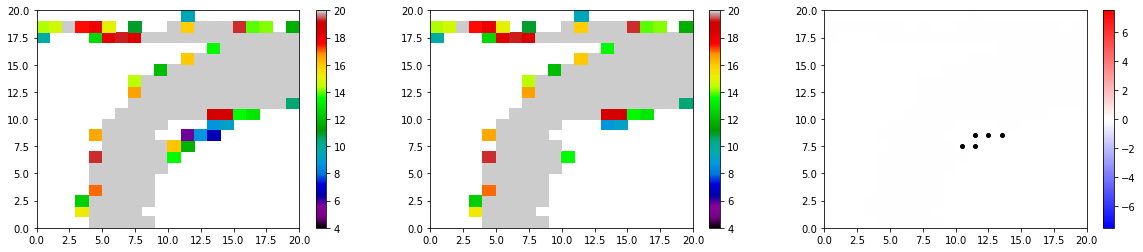

In [175]:
js, je = 125, 145
ii, ie = 30, 50
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

## Tile Four

* one key point difference: there is a point included in 201803 that is not in 201702.  It is fairly subtle and mostly below the satellite image, but there is also a pier there.  So OKAY.

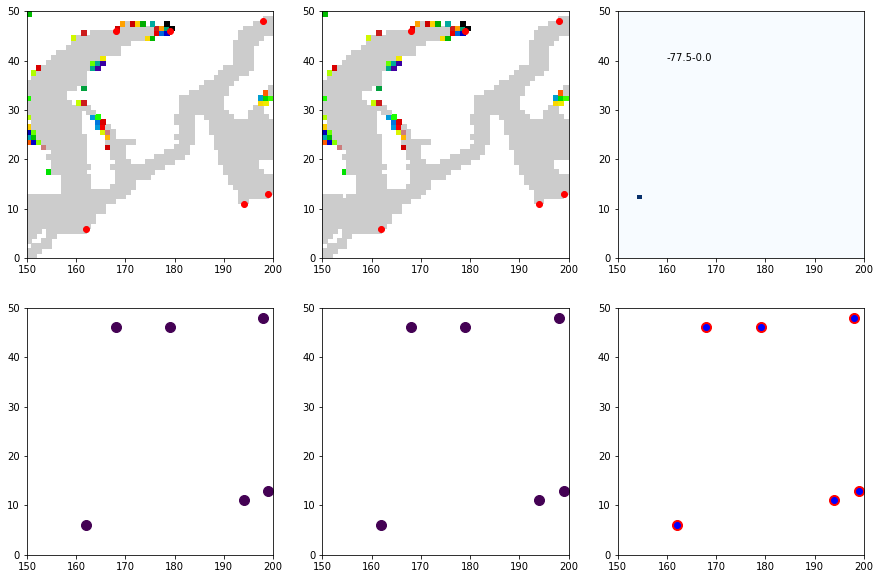

In [98]:
istart, iend = 0, 50
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)

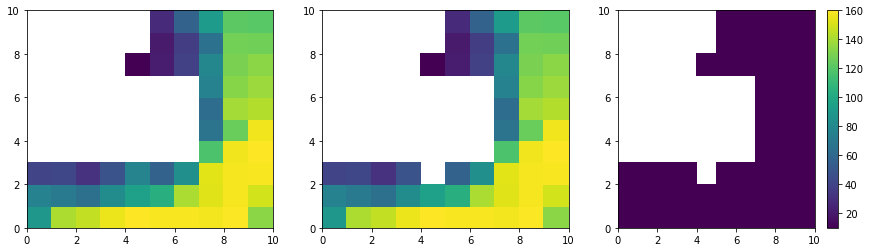

In [158]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[10:20, 150:160]);
fig.colorbar(colours, ax=axs[2])
axs[1].pcolormesh(b201803d.Bathymetry[10:20, 150:160]);
axs[2].pcolormesh(b201803d.Bathymetry[10:20, 150:160] - b201702.Bathymetry[10:20, 150:160])

## Tile Five

* no riversand no differences

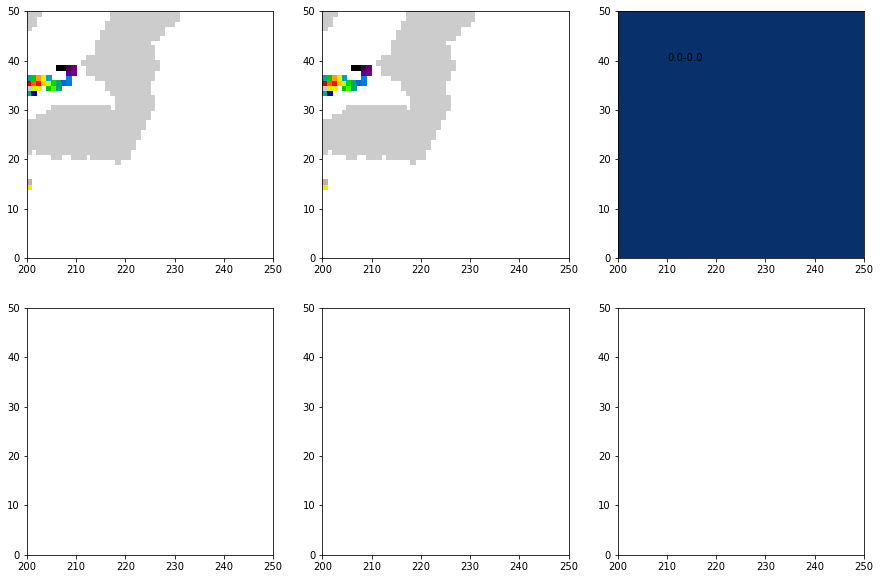

In [99]:
istart, iend = 0, 50
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Six, Seven, Eight, Nine, Ten

* empty

## Tile Eleven

* Narrows Hood Canal: looks okay on the map

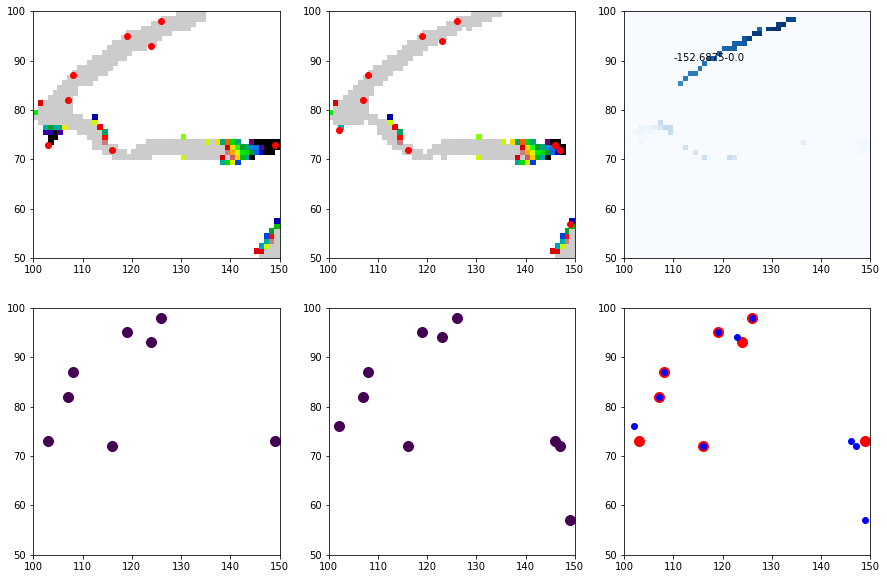

In [106]:
istart, iend = 50, 100
jstart, jend = 100, 150
make_the_plots(istart, iend, jstart,jend)

47.47027587890625 -123.09455871582031


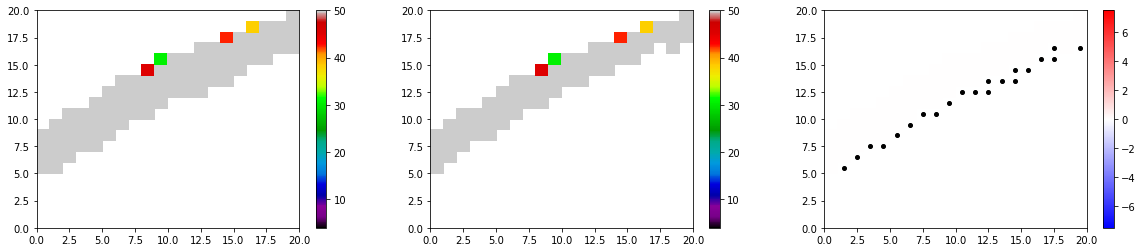

In [177]:
js, je = 110, 130
ii, ie = 80, 100
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=50);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=50);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

## Tile Twelve

* looks fine

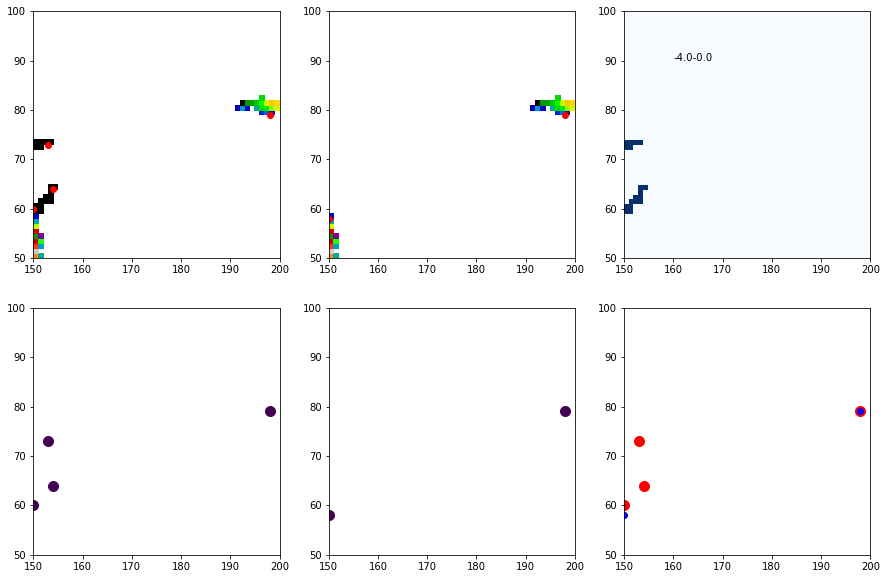

In [107]:
istart, iend = 50, 100
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)

## Tile Thirteen

* removed one point and the two nearest remain deeper (less need for smoothing)

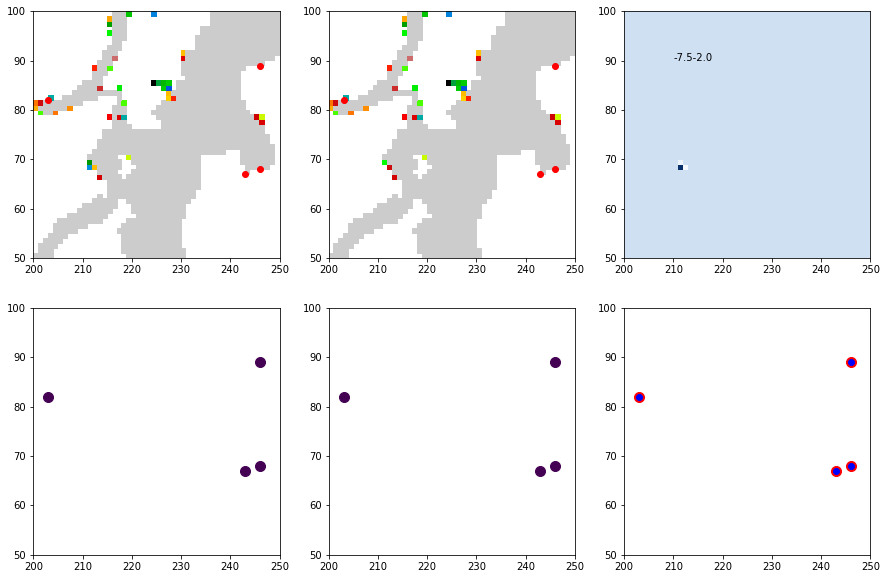

In [108]:
istart, iend = 50, 100
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

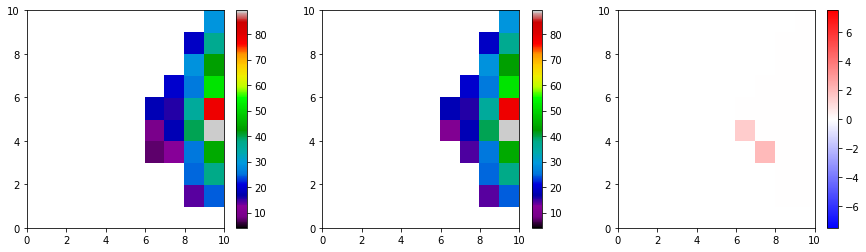

In [165]:
js, je = 205, 215
ii, ie = 65, 75
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);

## Tile Fourteen

* no difference

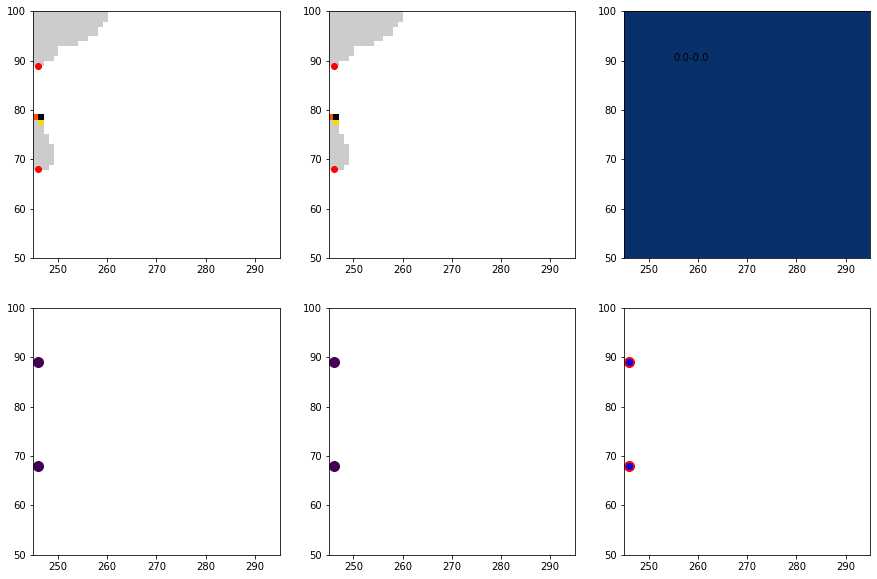

In [113]:
istart, iend = 50, 100
jstart, jend = 245, 295
make_the_plots(istart, iend, jstart,jend)

## Tile Fifteen, Sixteen, Seventeen, Eighteen

* empty

## Tile Nineteen

* slight narrowing

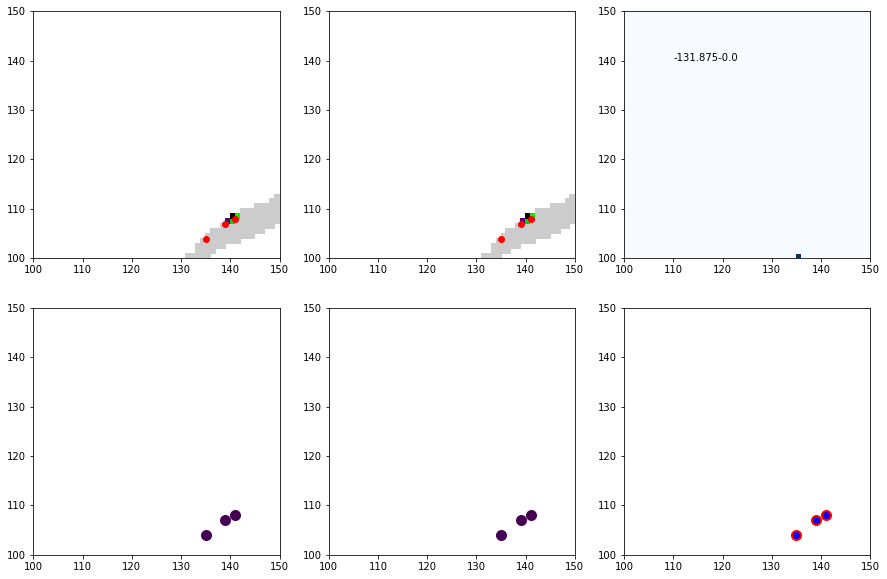

In [118]:
istart, iend = 100, 150
jstart, jend = 100, 150
make_the_plots(istart, iend, jstart,jend)

# Tile Twenty

* remove shallows at Dosewallips State Park

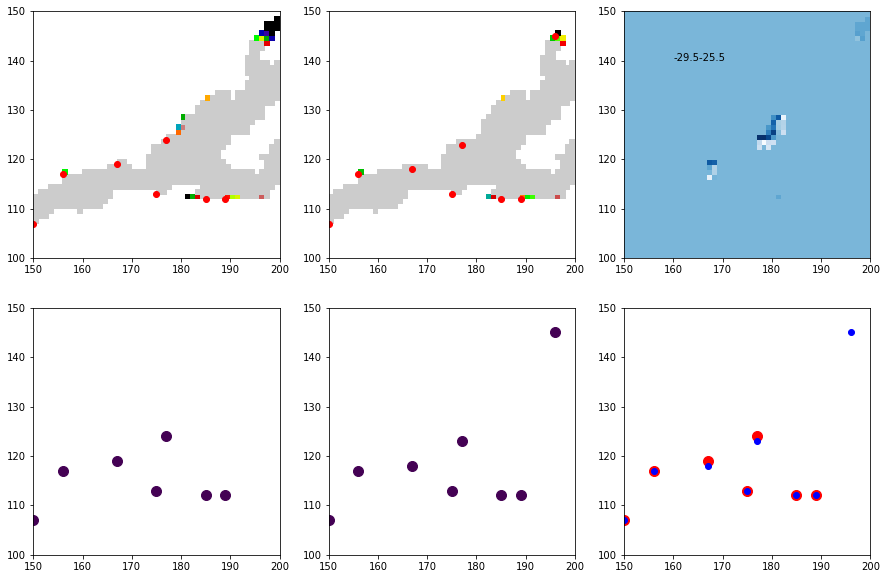

In [180]:
istart, iend = 100, 150
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)

47.69517135620117 -122.90435028076172


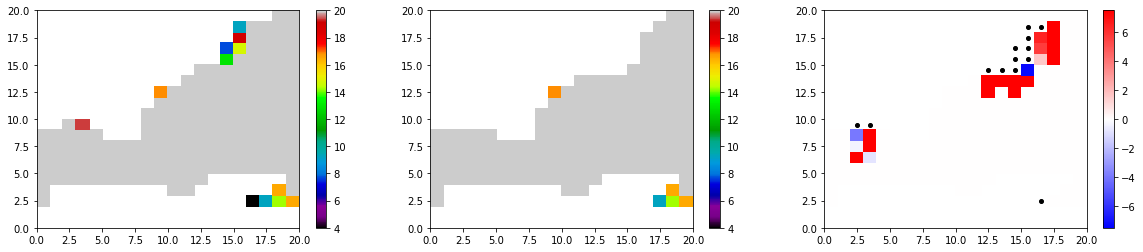

In [178]:
js, je = 165, 185
ii, ie = 110, 130
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

## Tile Twenty-One

* coastline changes, Port Gamble still there

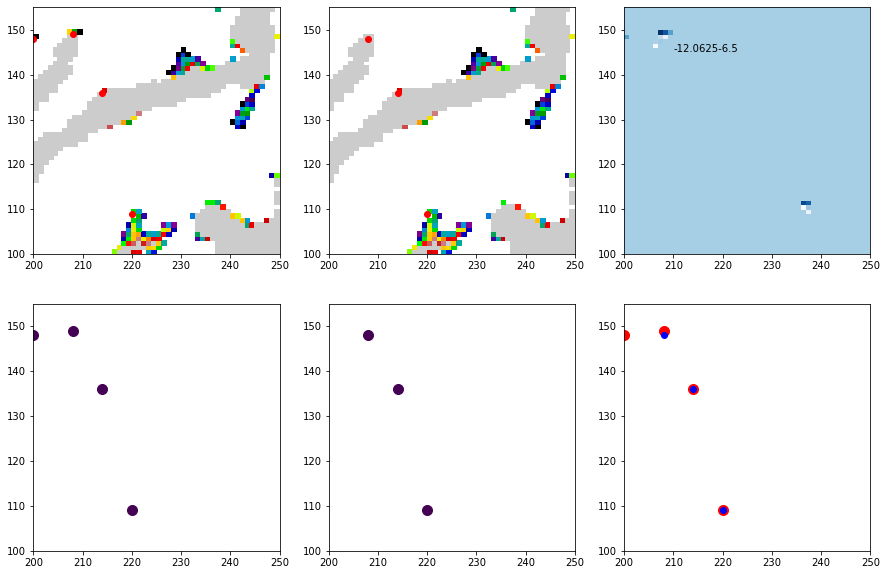

In [181]:
istart, iend = 100, 155
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Twenty-Two

* no change, no rivers

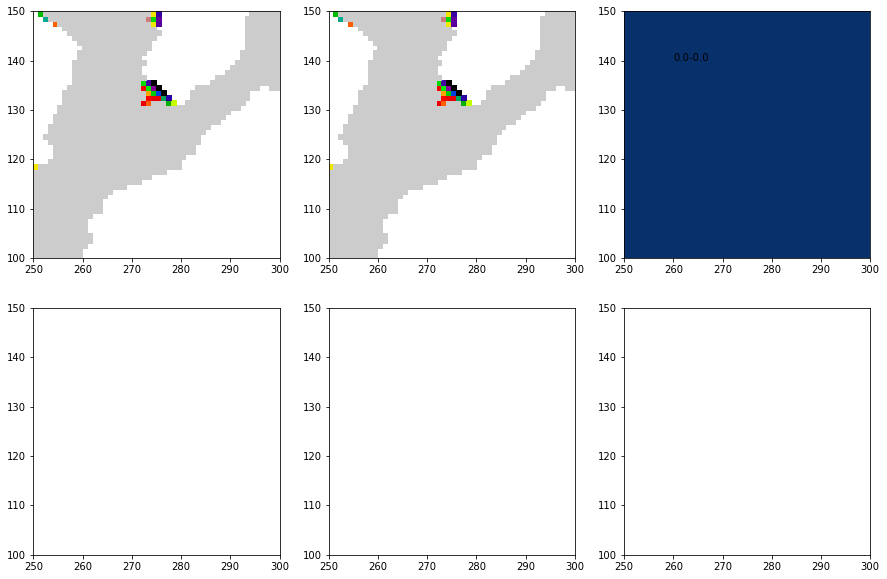

In [121]:
istart, iend = 100, 150
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

## Tile Twenty-Three

* take out Snohomish delta

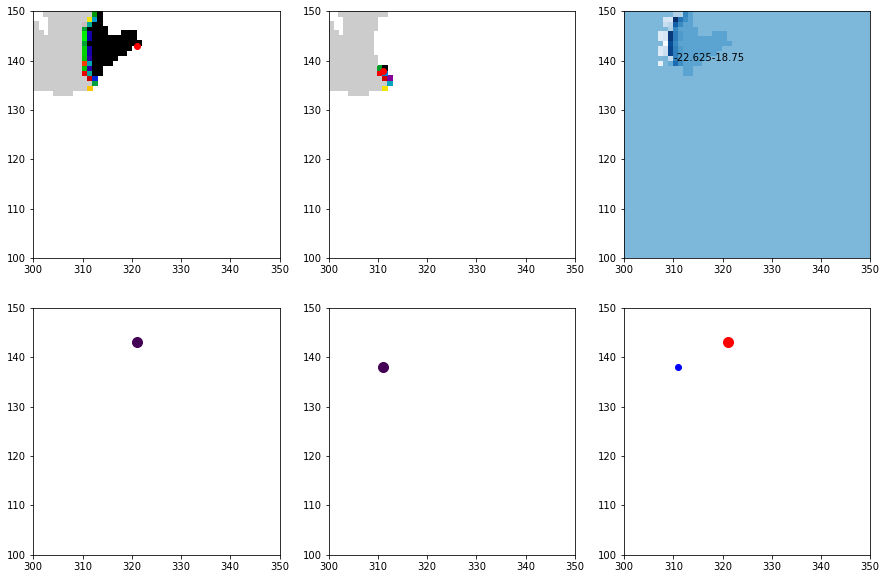

In [122]:
istart, iend = 100, 150
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

## Tile Twenty-Four, Twenty-Five, Twenty-Six, Twenty-Seven, Twenty-Eight

* empty

## Tile Twenty-Nine

* remove tidal lagoon on Marrowstone Island

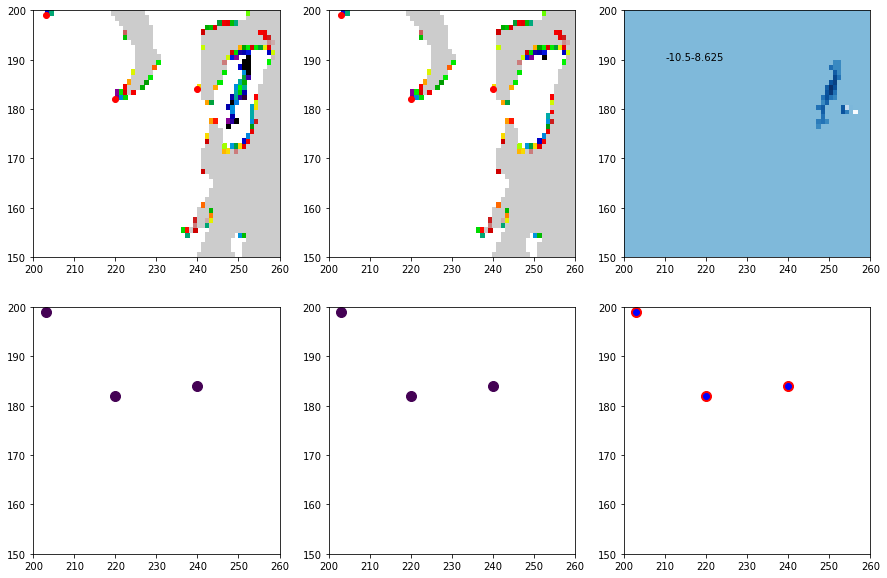

In [182]:
istart, iend = 150, 200
jstart, jend = 200, 260
make_the_plots(istart, iend, jstart,jend)

# Tile Thirty

* fine (see above for Marrowshone and below for eastern passages)

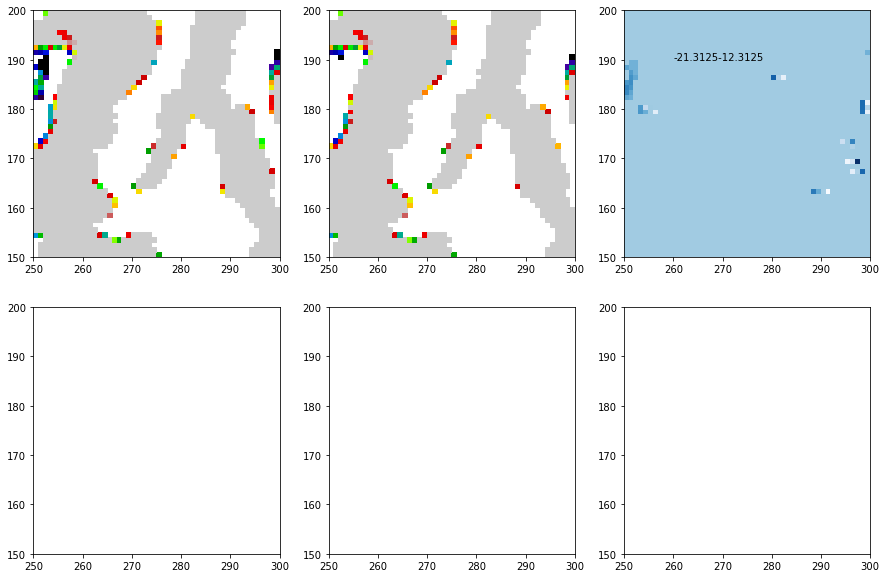

In [130]:
istart, iend = 150, 200
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

## Tile Thirty-One

* Remove Skagit Delta

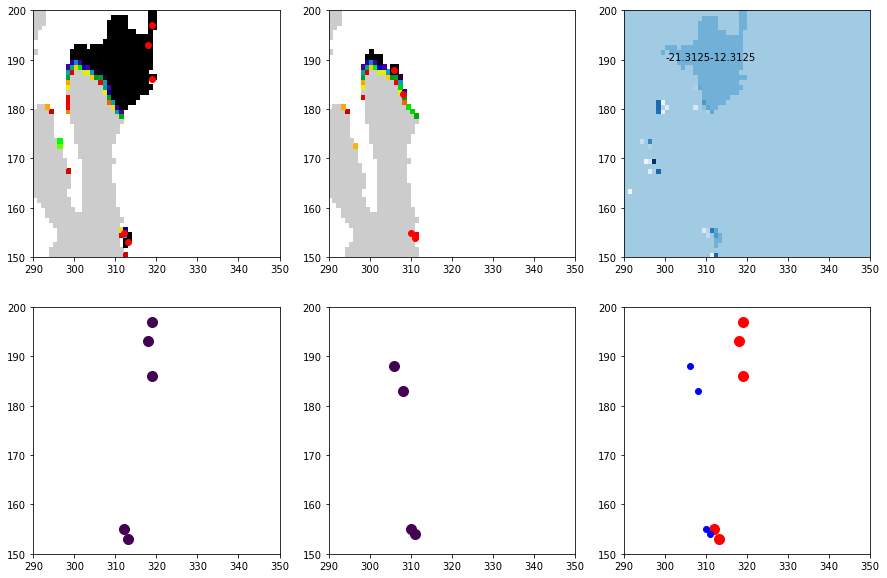

In [184]:
istart, iend = 150, 200
jstart, jend = 290, 350
make_the_plots(istart, iend, jstart,jend)

## Tile Thirty-two, Thirty-three, Thirty-four, Thirty-five

* empty

## Tile Thirty-six

* remove beaches around Port Angeles and Dungeness

48.12981033325195 -123.31436157226562


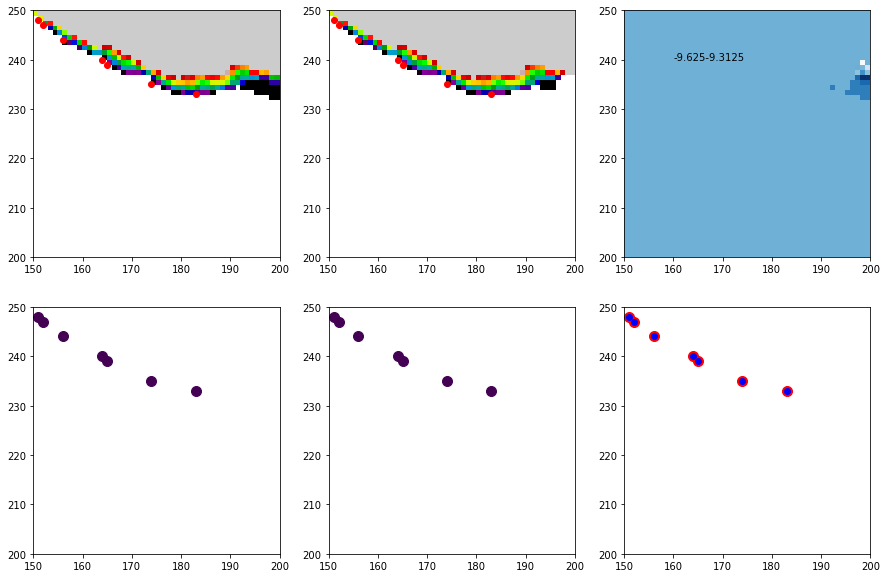

In [187]:
istart, iend = 200, 250
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)
print (b201702.nav_lat[240, 170].item(), b201702.nav_lon[240, 170].item())

## Tile Thirty-seven

* remove shallow water near Dungeness, add Protection Island

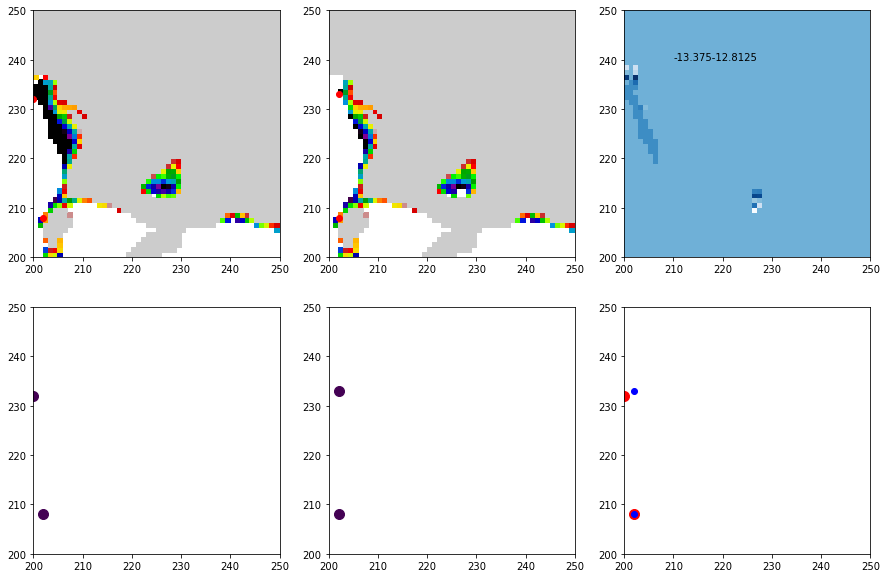

In [188]:
istart, iend = 200, 250
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Thirty-eight

* Coastline edits

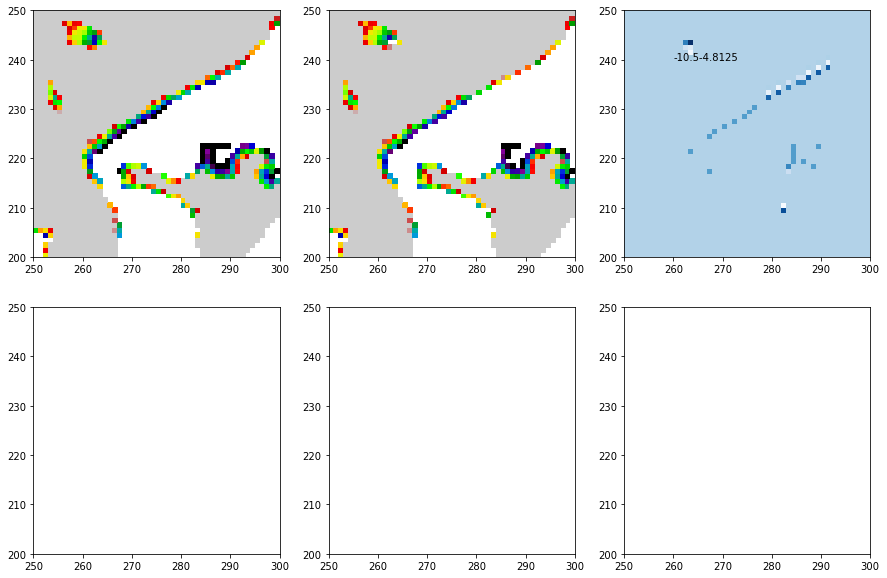

In [139]:
istart, iend = 200, 250
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

## Tile Thirty-nine

* remove much of Skagit Bay

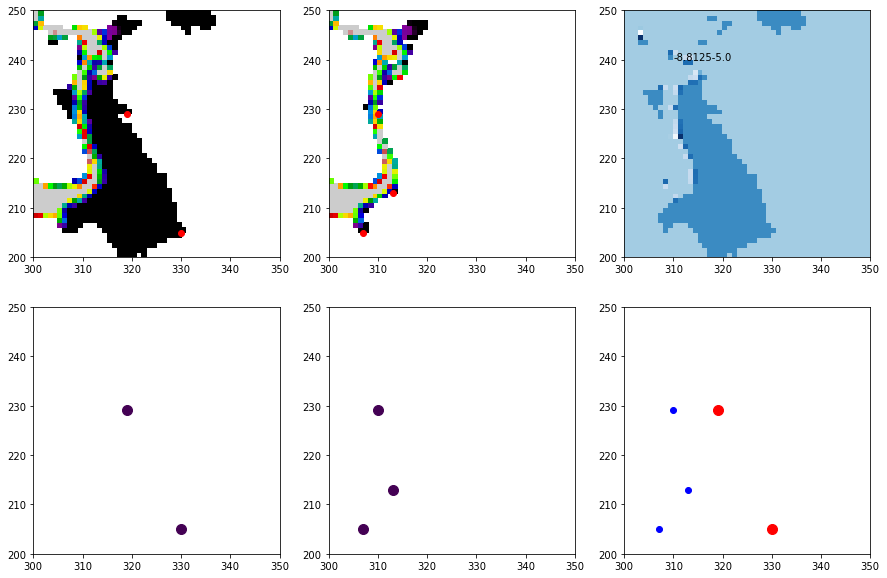

In [190]:
istart, iend = 200, 250
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

48.31036376953125 -122.49553680419922


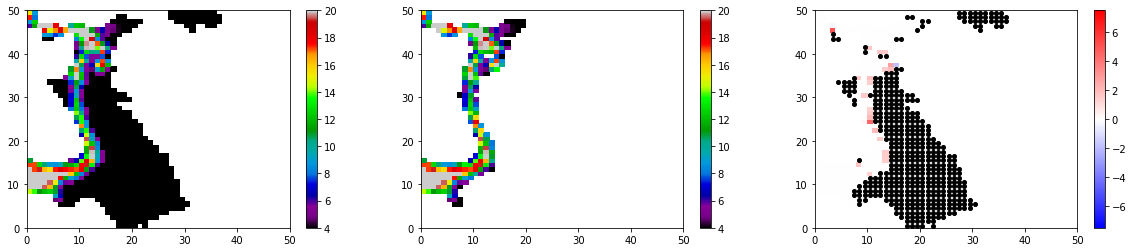

In [191]:
js, je = jstart, jend
ii, ie = istart, iend
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

## Tile Forty, Forty-one

* empty

## Tile Forty-two

* as expected

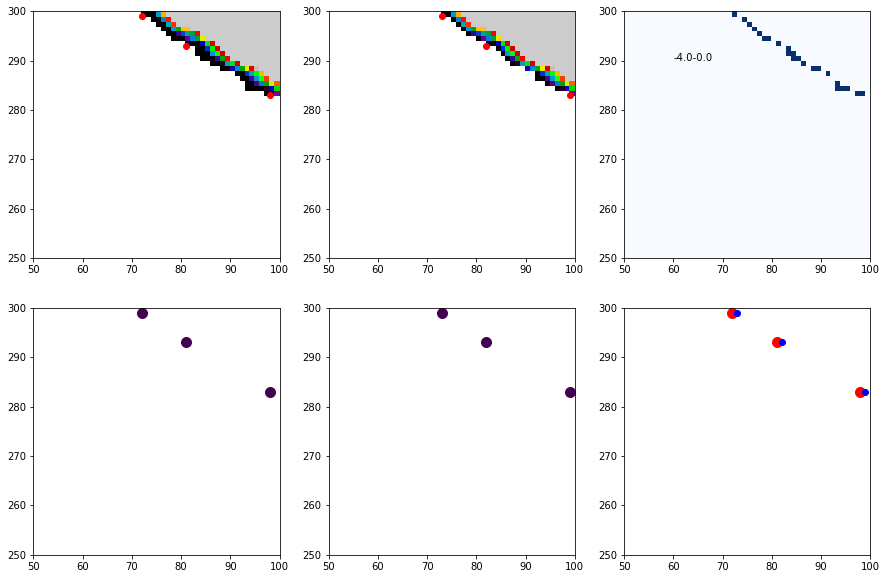

In [143]:
istart, iend = 250, 300
jstart, jend = 50, 100
make_the_plots(istart, iend, jstart,jend)

## Tile Forty-three

* coastline edits

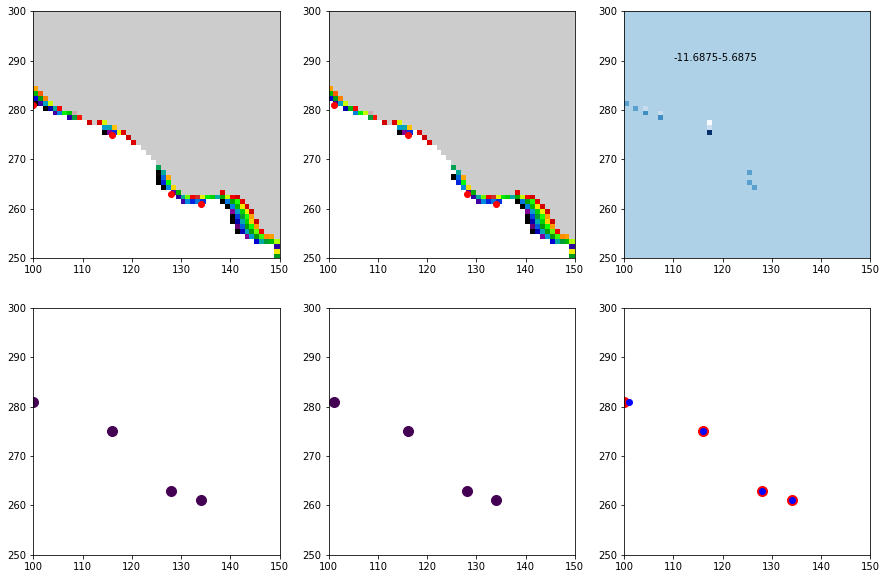

In [144]:
istart, iend = 250, 300
jstart, jend = 100, 150
make_the_plots(istart, iend, jstart,jend)

## Tile Forty-four

* coastline edits

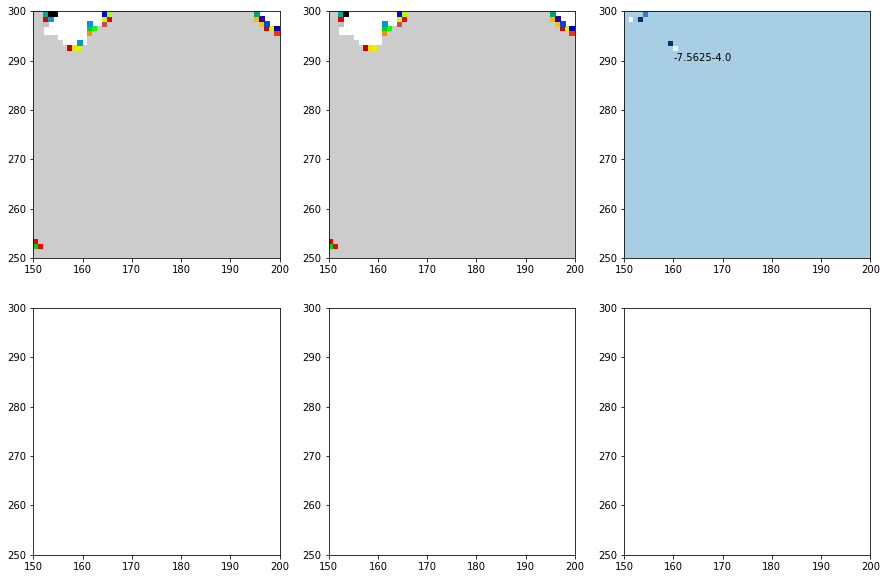

In [145]:
istart, iend = 250, 300
jstart, jend = 150, 200
make_the_plots(istart, iend, jstart,jend)

## Tile Forty-five

* coastline edits

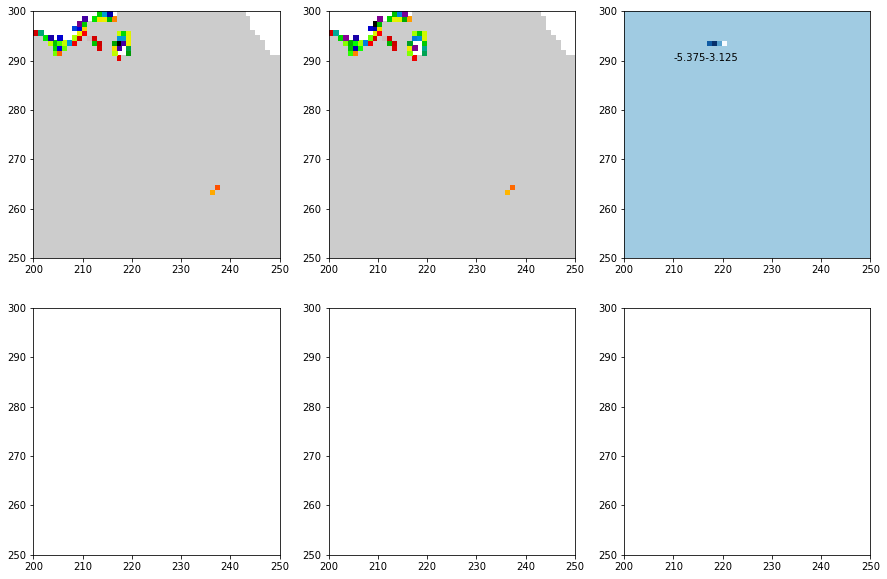

In [146]:
istart, iend = 250, 300
jstart, jend = 200, 250
make_the_plots(istart, iend, jstart,jend)

## Tile Forty-six

* coastline changes

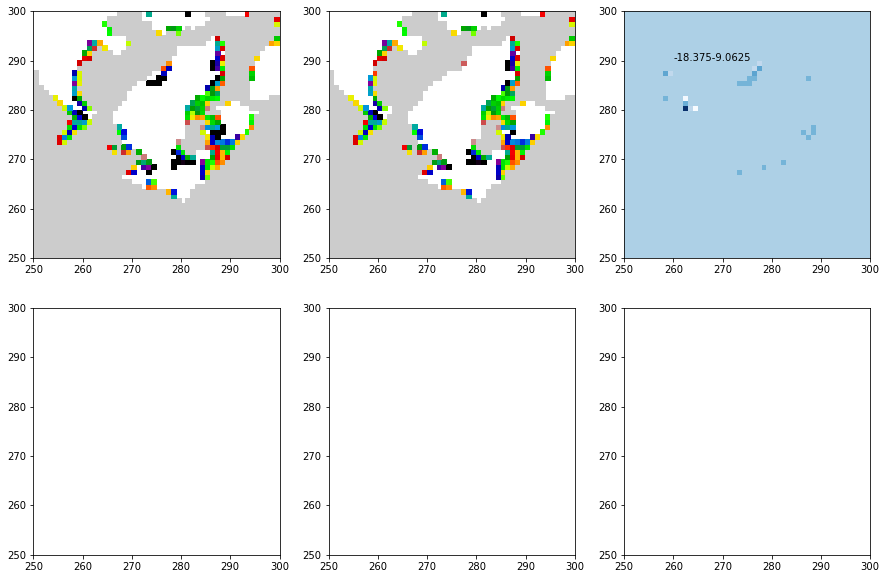

In [196]:
istart, iend = 250, 300
jstart, jend = 250, 300
make_the_plots(istart, iend, jstart,jend)

48.45240020751953 -122.88871765136719


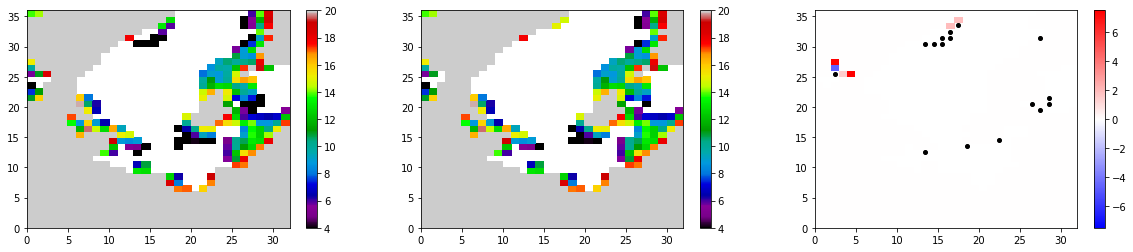

In [194]:
js, je = istart+10, iend-8
ii, ie = jstart+5, jend-9
print (b201702.nav_lat[ii+17,js+12].item(), b201702.nav_lon[ii+17, js+12].item())
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
colours = axs[0].pcolormesh(b201702.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(b201803d.Bathymetry[ii:ie, js:je], cmap='nipy_spectral', vmin=4, vmax=20);
fig.colorbar(colours, ax=axs[1])
colours = axs[2].pcolormesh(b201803d.Bathymetry[ii:ie, js:je] - b201702.Bathymetry[ii:ie, js:je], cmap='bwr', vmin=-7.5, vmax=7.5);
fig.colorbar(colours, ax=axs[2]);
for i in range(ii, ie):
    for j in range(js, je):
        if b201702.Bathymetry[i, j] == b201702.Bathymetry[i, j] and b201803d.Bathymetry[i, j] != b201803d.Bathymetry[i, j]:
            axs[2].plot(j -js + 0.5, i-ii + 0.5, 'ko', markersize=4)

## Tile Forty-seven

* remove Padilla Bay

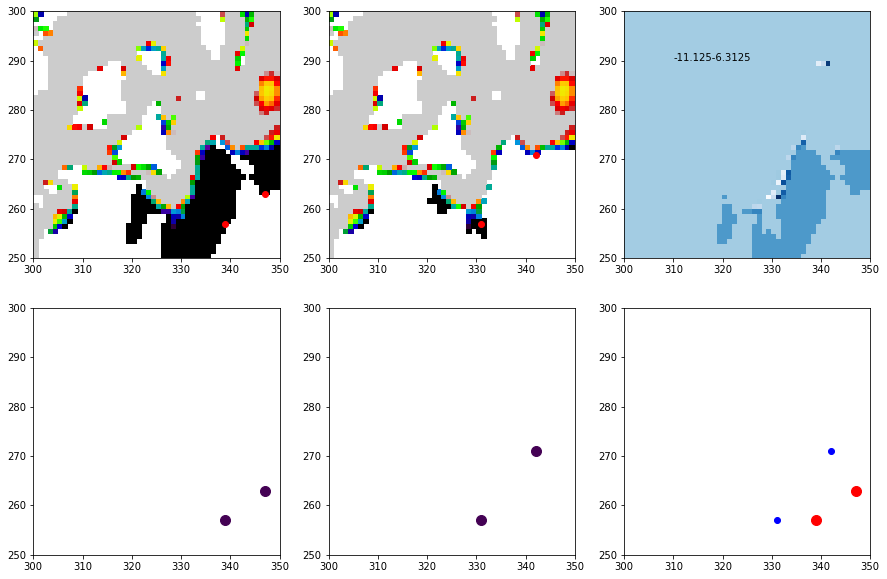

In [148]:
istart, iend = 250, 300
jstart, jend = 300, 350
make_the_plots(istart, iend, jstart,jend)

## Tile Forty-eight

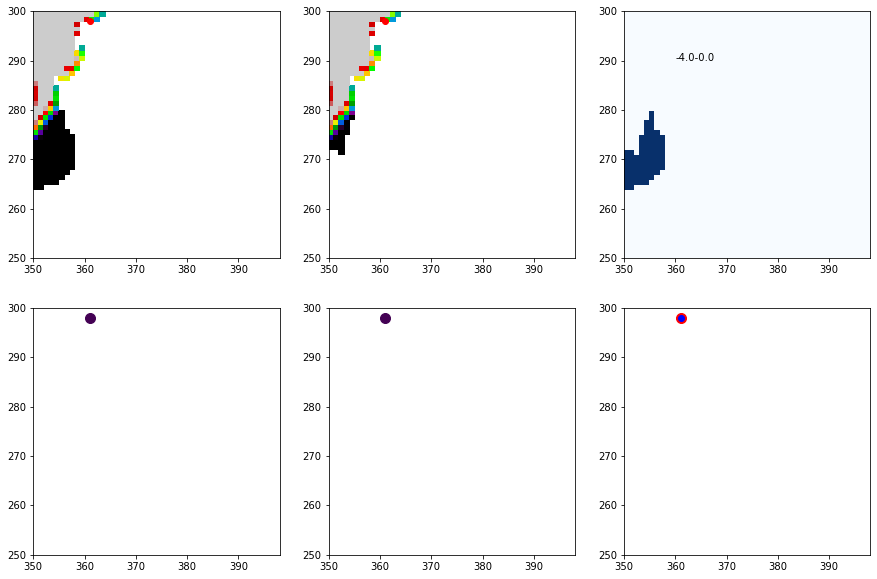

In [149]:
istart, iend = 250, 300
jstart, jend = 350, 398
make_the_plots(istart, iend, jstart,jend)